# Analyzing Road Accident Data 

Task Requirement =  Analyze Road Accident data to identify patterns related to road conditions, weather and time of day.

Visualyze accidents hotspots and contributing factors.

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_excel(r"C:\Users\reals\Downloads\Road Accident Data.xlsx")
df.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,BS0000001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car
1,BS0000002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car
2,BS0000003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19:00,Urban,Fine no high winds,Taxi/Private hire car
3,BS0000004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10:00,Urban,Other,Motorcycle over 500cc
4,BS0000005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25:00,Urban,Fine no high winds,Car


In [5]:
df.shape

(307973, 21)

# Data Preprocessing And Exploratory Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident_Index              307973 non-null  object        
 1   Accident Date               307973 non-null  datetime64[ns]
 2   Day_of_Week                 307973 non-null  object        
 3   Junction_Control            307973 non-null  object        
 4   Junction_Detail             307973 non-null  object        
 5   Accident_Severity           307973 non-null  object        
 6   Latitude                    307973 non-null  float64       
 7   Light_Conditions            307973 non-null  object        
 8   Local_Authority_(District)  307973 non-null  object        
 9   Carriageway_Hazards         5424 non-null    object        
 10  Longitude                   307973 non-null  float64       
 11  Number_of_Casualties        307973 non-

In [63]:
df.describe()

,Accident Date,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,307973,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000
mean,2021-12-23 22:19:39.804722944,52.487005,-1.368884,1.356882,1.829063,38.866037
min,2021-01-01 00:00:00,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,2021-06-28 00:00:00,51.485248,-2.247937,1.000000,1.000000,30.000000
50%,2021-12-08 00:00:00,52.225943,-1.349258,1.000000,2.000000,30.000000
75%,2022-06-25 00:00:00,53.415517,-0.206810,1.000000,2.000000,50.000000
max,2022-12-31 00:00:00,60.598055,1.759398,48.000000,32.000000,70.000000
std,NaN,1.339011,1.356092,0.815857,0.710477,14.032933


In [8]:
df.isnull().sum()

Accident_Index                     0
Accident Date                      0
Day_of_Week                        0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Latitude                           0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           302549
Longitude                          0
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions            0
Road_Type                          0
Speed_limit                        0
Time                              17
Urban_or_Rural_Area                0
Weather_Conditions                 0
Vehicle_Type                       0
dtype: int64

In [9]:
# Droping Column With Null values
df = df.drop(columns={'Time'})

In [10]:
# Converting given date format column to month names 
df['Accident Date'] = pd.to_datetime(df['Accident Date'], dayfirst=True)

# Extracting the month name 
df['month'] = df['Accident Date'].dt.month_name()


In [11]:
df['month']

0          January
1          January
2          January
3          January
4          January
            ...   
307968    February
307969    February
307970    February
307971    February
307972    February
Name: month, Length: 307973, dtype: object

In [69]:
df.columns

Index(['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control',
       'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Carriageway_Hazards', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Speed_limit',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type', 'month'],
      dtype='object')

In [13]:
df['Accident_Severity'].value_counts()

Accident_Severity
Slight     263280
Serious     40740
Fatal        3904
Fetal          49
Name: count, dtype: int64

In [14]:
df['Accident_Severity'] = df['Accident_Severity'].replace('Fetal','Fatal')

In [15]:
df['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     208967
Wet or damp              81796
Frost or ice             12078
Snow                      4758
Flood over 3cm. deep       374
Name: count, dtype: int64

In [16]:
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].replace('Frost or ice','Snow')
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].replace('Wet or damp','Wet')
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].replace('Flood over 3cm. deep','Wet')

In [17]:
df['Road_Type'].value_counts()

Road_Type
Single carriageway    230612
Dual carriageway       45467
Roundabout             20929
One way street          6197
Slip road               4768
Name: count, dtype: int64

In [18]:
df['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban    198532
Rural    109441
Name: count, dtype: int64

In [19]:
df['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       244496
Raining no high winds     37841
Other                      8802
Snowing no high winds      4839
Fog or mist                4783
Raining + high winds       3526
Fine + high winds          3148
Snowing + high winds        538
Name: count, dtype: int64

In [20]:
df['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      239794
Van / Goods 3.5 tonnes mgw or under       15695
Motorcycle over 500cc                     11226
Bus or coach (17 or more pass seats)       8686
Motorcycle 125cc and under                 6852
Goods 7.5 tonnes mgw and over              6532
Taxi/Private hire car                      5543
Motorcycle 50cc and under                  3703
Motorcycle over 125cc and up to 500cc      3285
Other vehicle                              2516
Goods over 3.5t. and under 7.5t            2502
Minibus (8 - 16 passenger seats)            821
Agricultural vehicle                        749
Pedal cycle                                  66
Ridden horse                                  3
Name: count, dtype: int64

In [21]:
df['Vehicle_Type'] = df['Vehicle_Type'].replace('Taxi/Private hire car','Car')
df['Vehicle_Type'] = df['Vehicle_Type'].replace('Motorcycle 50cc and under','Motorcycle')
df['Vehicle_Type'] = df['Vehicle_Type'].replace('Motorcycle over 125cc and up to 500cc','Motorcycle')
df['Vehicle_Type'] = df['Vehicle_Type'].replace('Motorcycle over 500cc','Motorcycle')
df['Vehicle_Type'] = df['Vehicle_Type'].replace('Motorcycle 125cc and under','Motorcycle')
df['Vehicle_Type'] = df['Vehicle_Type'].replace('Bus or coach (17 or more pass seats)','Bus')
df['Vehicle_Type'] = df['Vehicle_Type'].replace('Minibus (8 - 16 passenger seats)','Bus')
df['Vehicle_Type'] = df['Vehicle_Type'].replace('Van / Goods 3.5 tonnes mgw or under','Bus')
df['Vehicle_Type'] = df['Vehicle_Type'].replace('Goods over 3.5t. and under 7.5t','Truck\Tractor')
df['Vehicle_Type'] = df['Vehicle_Type'].replace('Goods 7.5 tonnes mgw and over','Truck\Tractor')
df['Vehicle_Type'] = df['Vehicle_Type'].replace('Agricultural vehicle','Truck\Tractor')

In [22]:
df['Vehicle_Type'].value_counts()

Vehicle_Type
Car              245337
Bus               25202
Motorcycle        25066
Truck\Tractor      9783
Other vehicle      2516
Pedal cycle          66
Ridden horse          3
Name: count, dtype: int64

In [55]:
df['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       227286
Darkness - lights lit           60093
Darkness - no lighting          16528
Darkness - lighting unknown      2924
Darkness - lights unlit          1142
Name: count, dtype: int64

In [56]:
df['Light_Conditions'] = df['Light_Conditions'].replace('Darkness - lights lit','Darkness')
df['Light_Conditions'] = df['Light_Conditions'].replace('Darkness - no lighting','Darkness')
df['Light_Conditions'] = df['Light_Conditions'].replace('Darkness - lighting unknown','Darkness')
df['Light_Conditions'] = df['Light_Conditions'].replace('Darkness - lights unlit','Darkness')

In [57]:
df['Light_Conditions'].value_counts()

Light_Conditions
Daylight    227286
Darkness     80687
Name: count, dtype: int64

In [23]:
# Total Number of casualties happened in two years 
df['Number_of_Casualties'].sum()

417883

c:\Users\reals\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


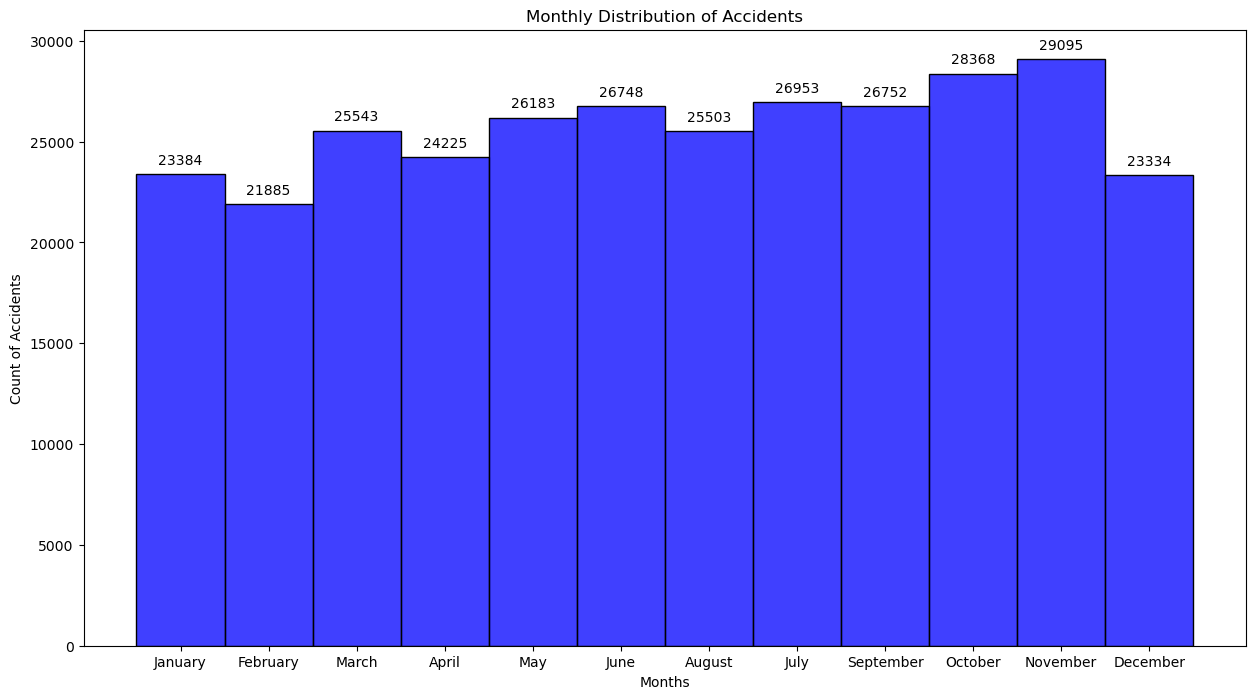

In [43]:
# Visualizng Monthly Accidents
plt.figure(figsize=(15, 8))
hist_plot = sns.histplot(data=df, x='month', bins=12, color='blue')
plt.title('Monthly Distribution of Accidents')
plt.xlabel('Months')
plt.ylabel('Count of Accidents')

# Adding data labels on top of each bin using containers
for container in hist_plot.containers:
    hist_plot.bar_label(container, fmt='%d', label_type='edge', padding=5, fontsize=10, color='black')
    
plt.show()

c:\Users\reals\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


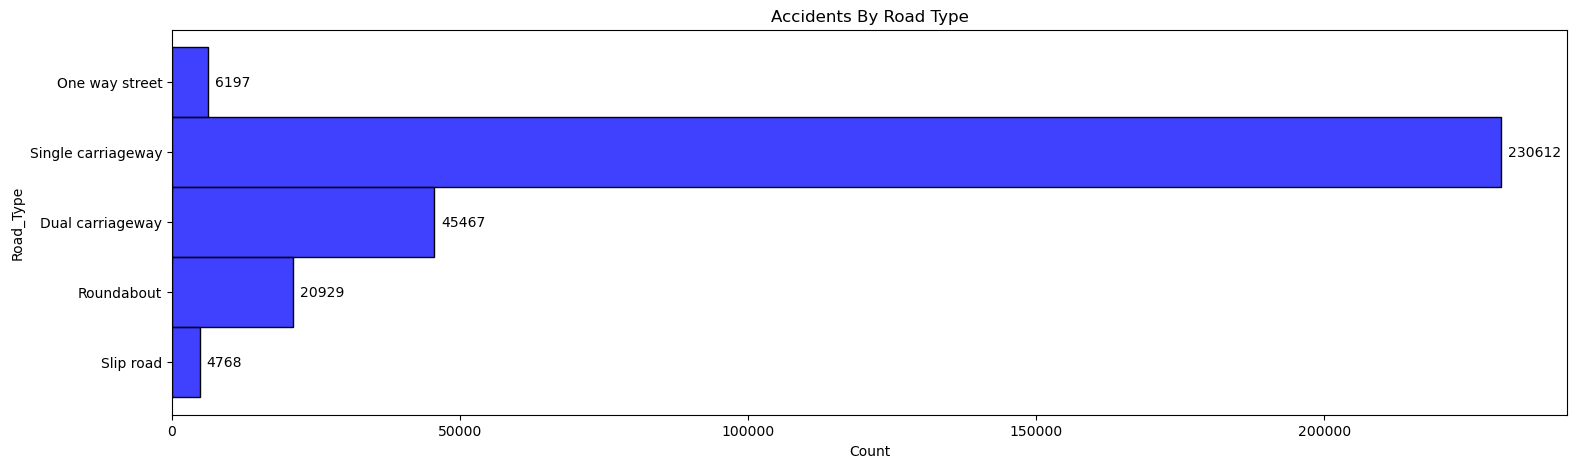

In [41]:
# Visualizing Accidents by Road Type
plt.figure(figsize=(18,5))
hist_plot = sns.histplot(data=df, y='Road_Type', bins=5, color='blue')
plt.title('Accidents By Road Type')

for container in hist_plot.containers:
    hist_plot.bar_label(container, fmt='%d', label_type='edge', padding=5, fontsize=10, color='black')
    
plt.show()

c:\Users\reals\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


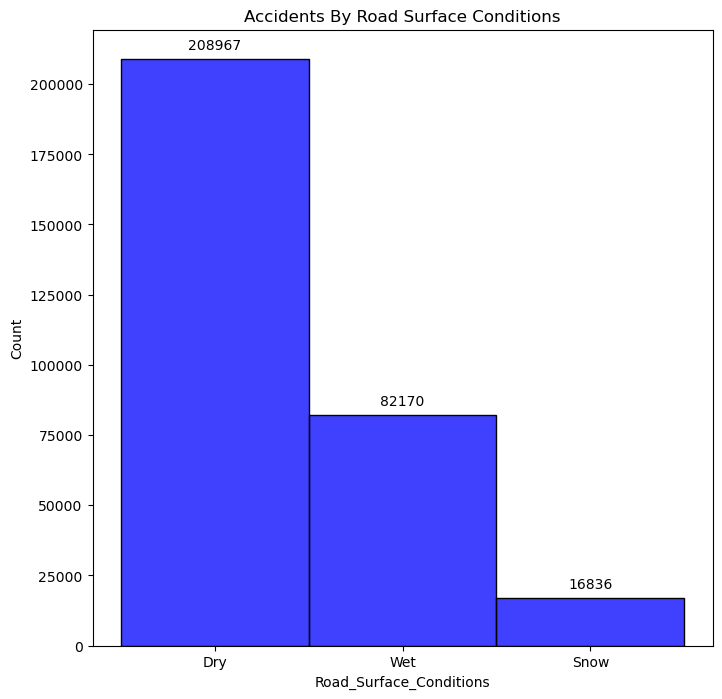

In [62]:
# Visualizing Accidents by Road_Surface_Conditions
plt.figure(figsize=(8,8))
hist_plot = sns.histplot(data=df, x='Road_Surface_Conditions', bins=30,color='blue')
plt.title('Accidents By Road Surface Conditions')

for container in hist_plot.containers:
    hist_plot.bar_label(container, fmt='%d', label_type='edge', padding=5, fontsize=10, color='black')
    
plt.show()

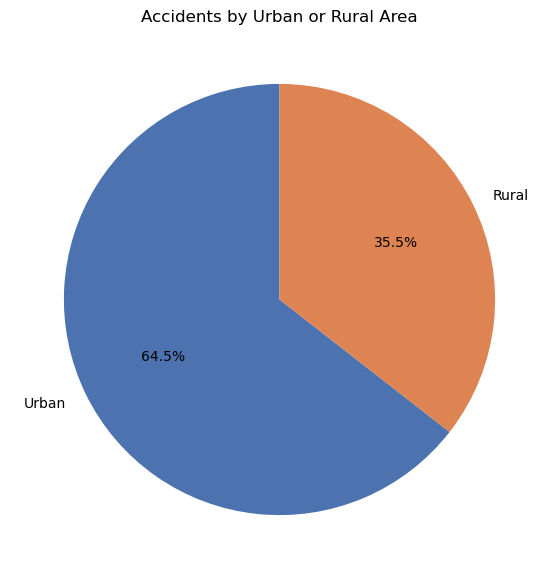

In [26]:
area_counts = df['Urban_or_Rural_Area'].value_counts()

# Create a pie chart
plt.figure(figsize=(7, 7))
plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("deep"))
plt.title('Accidents by Urban or Rural Area')
plt.show()


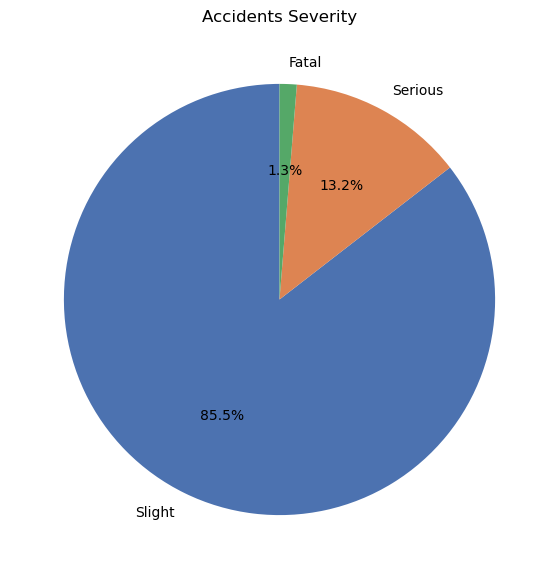

In [73]:
area_counts = df['Accident_Severity'].value_counts()

# Create a pie chart
plt.figure(figsize=(7, 7))
plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("deep"))
plt.title('Accidents Severity')
plt.show()

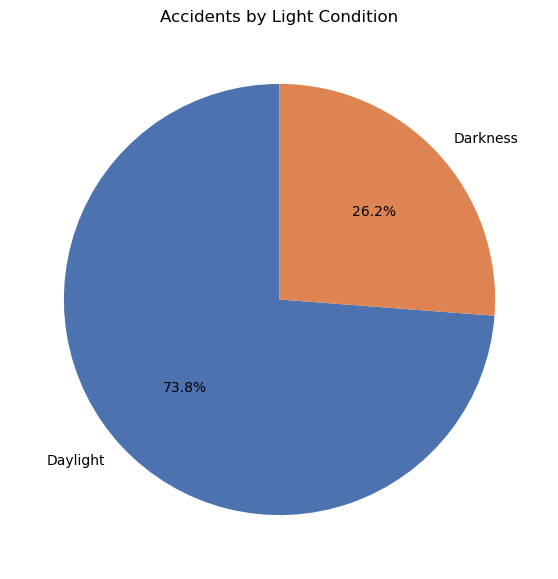

In [68]:
area_counts = df['Light_Conditions'].value_counts()

# Create a pie chart
plt.figure(figsize=(7, 7))
plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("deep"))
plt.title('Accidents by Light Condition')
plt.show()


c:\Users\reals\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


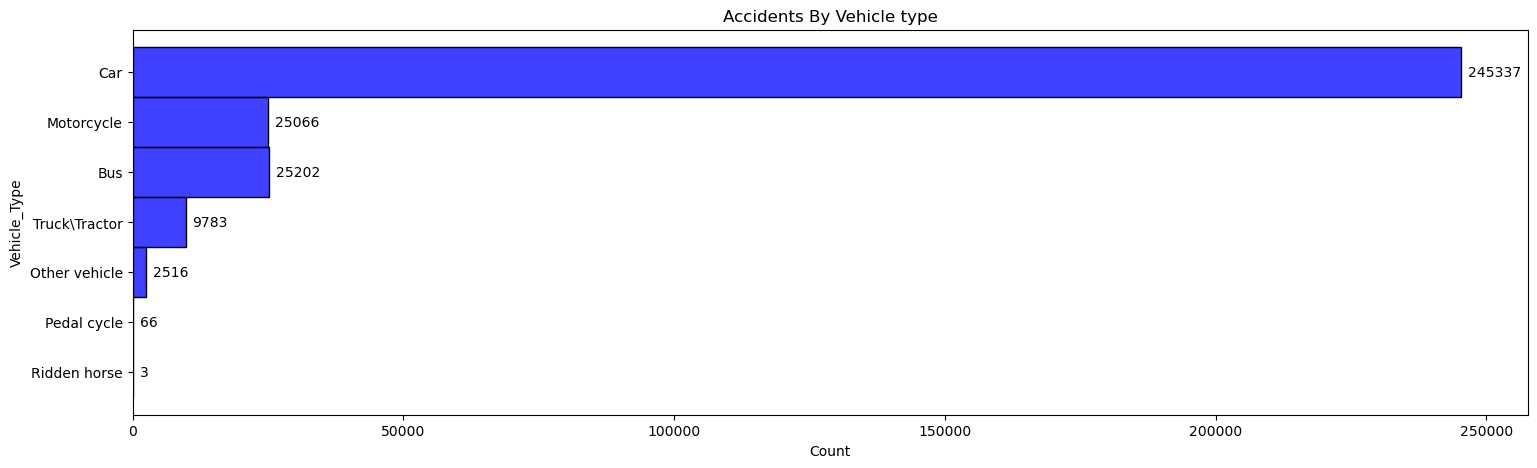

In [70]:
# Visualizing Accidents by Vehicle's
plt.figure(figsize=(18,5))
hist_plot = sns.histplot(data=df, y='Vehicle_Type', bins=30,color='blue')
plt.title('Accidents By Vehicle type')

for container in hist_plot.containers:
    hist_plot.bar_label(container, fmt='%d', label_type='edge', padding=5, fontsize=10, color='black')
    
plt.show()

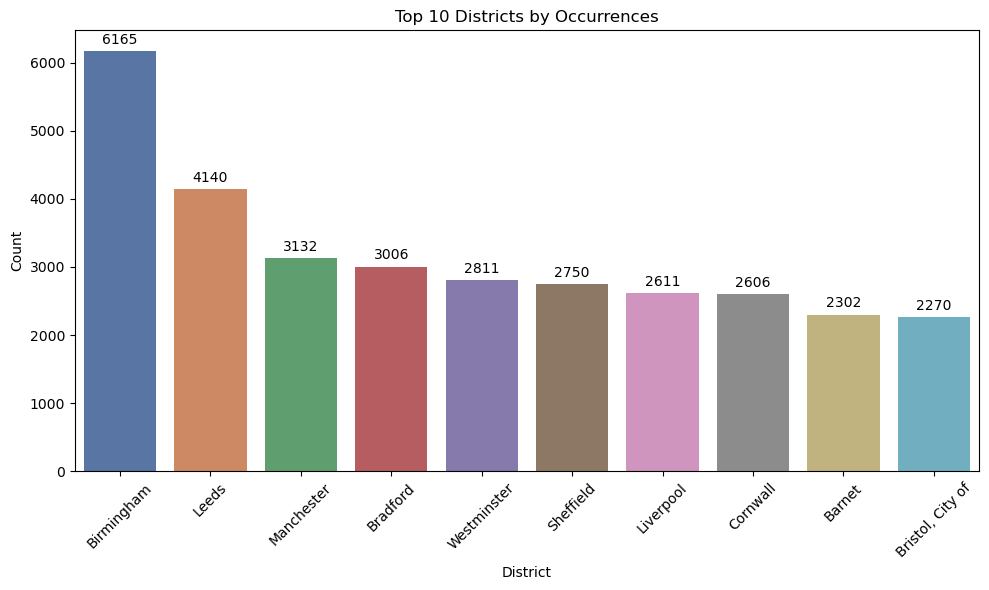

In [53]:
top_states = df['Local_Authority_(District)'].value_counts().nlargest(10).reset_index()
top_states.columns = ['Local_Authority_(District)', 'Count']
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Local_Authority_(District)', y='Count', data=top_states, palette='deep')
plt.title('Top 10 Districts by Occurrences')
plt.xlabel('District')
plt.ylabel('Count')

for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 8), textcoords='offset points', 
                      fontsize=10, color='black')
    
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Insights Gained

By Road type Single Carriageway has the most amount of Accidents '23061' (74.88%)

By road surface condition Dry roads have the most amount of accidents '208967' (67.85%)

Urban Area has been involved in more accidents '64.5%' then Rural areas '35.5%'

Most of the Accidents happened on Daylight 73.8% 

Top three vehicles ahich appeared most in accidents are Car's (245337), Motorcycle (25066) and Buses (25202)

Top ten district's where most of the accidents happened are Birmingham (6165), Leeds (4140), Manchester (3132), Bradford (3006), Westminister(2811),
sheffield (2750), Liverpool (2611), Cornwall (2606), Barnet (2302), and Bristol (2270)


## Suggestion and Ideas to stop Accidents or slow the rate of accidents :

we Should reduce the speed limit of singal Carriageway to Reduce the rate of accidents.

we should use more board signs on road to remind drivers to check their tyres befors driving of dry roads.

we should use more trafic lights and tarffic police in urban areas mostly in those top ten states to reduce the rate of accidents.

we should use more road safety education to the drivers to reduce the rate of accidents.

we should courage people on cars to wear seat belts and for motorcycle drivers to  use Helmet as neccessary and daily for their benefit.